In [107]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

## Q 1

In [108]:
Sig_Eqs = pd.read_csv("earthquakes-2021-10-27_14-01-31_+0800.tsv",sep = "\t")
# Sig_Eqs["Year"] = Sig_Eqs["Year"].astype("int")
print(Sig_Eqs.columns)

Index(['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Country', 'Area', 'Region', 'Location Name', 'Latitude',
       'Longitude', 'Focal Depth (km)', 'Mag', 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa',
       'Unk', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')


In [25]:
## 1.1
# grouped = Sig_Eqs.groupby("Country")["Deaths"]
Deaths = pd.DataFrame(Sig_Eqs.groupby("Country")["Deaths"].count())
ans_1 = Deaths.sort_values(by="Deaths", ascending=False)[0:10]
print(ans_1)

             Deaths
Country            
CHINA           277
IRAN            187
TURKEY          164
INDONESIA       134
ITALY           119
JAPAN           108
PERU             86
GREECE           77
TAIWAN           66
PHILIPPINES      60


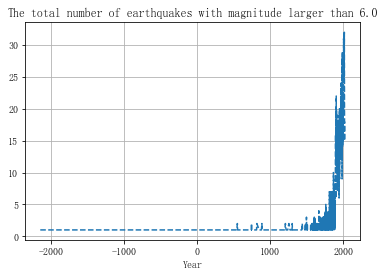

In [46]:
## 1.2
index_mag = Sig_Eqs["Mag"]>6
num = Sig_Eqs[index_mag].groupby("Year")["Mag"].count()
num.plot(kind='line', grid=True, title='The total number of earthquakes with magnitude larger than 6.0', style='--')
plt.show()

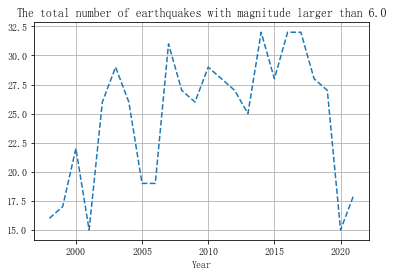

In [57]:
fixed_year = num[1998:]
fixed_year.plot(kind='line', grid=True, title='The total number of earthquakes with magnitude larger than 6.0', style='--')
plt.show()

In [97]:
## 1.3
def CountEq_LargestEq(Country):
    num = Sig_Eqs[Sig_Eqs["Mag"]>0].groupby(["Country"])["Mag"].count()
    print(num["Country"])
    
CountEq_LargestEq(ALBANIA)    

NameError: name 'ALBANIA' is not defined

In [87]:
Sig_Eqs[Sig_Eqs["Mag"]>0].groupby(["Country","Year"]).agg({"Mag":"count"})
grouped = pd.DataFrame(Sig_Eqs.groupby(["Country"])["Mag"].count())
grouped
    if Country in Sig_Eqs["Country"]：
        print(num("Country"))
    else:
        print("Try another country")

Mag
Country                              Year       
AFGHANISTAN                          818.0     1
                                     1102.0    1
                                     1896.0    1
                                     1908.0    1
                                     1909.0    1
...                                          ...
WALLIS AND FUTUNA (FRENCH TERRITORY) 1993.0    1
YEMEN                                1941.0    1
                                     1982.0    1
                                     1991.0    1
ZAMBIA                               2017.0    1

[2906 rows x 1 columns]

In [92]:
t = Sig_Eqs[Sig_Eqs["Mag"]>0].groupby(["Country"])["Mag"].count()
t["ALBANIA"]

34

In [94]:
type(Sig_Eqs["Country"])

pandas.core.series.Series

## Q 2

In [106]:
date_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
wind_speed = pd.read_csv("2281305.csv",date_parser = date_parse)
print(wind_speed.columns)
wind_speed.head()

Index(['STATION', 'DATE', 'SOURCE', 'REPORT_TYPE', 'CALL_SIGN',
       'QUALITY_CONTROL', 'AA1', 'AA2', 'AA3', 'AJ1', 'AY1', 'AY2',
       'CALL_SIGN.1', 'CIG', 'DEW', 'ED1', 'EQD', 'GA1', 'GA2', 'GA3', 'GA4',
       'GA5', 'GE1', 'GF1', 'IA2', 'KA1', 'KA2', 'MA1', 'MD1', 'MW1', 'MW2',
       'MW3', 'OC1', 'OD1', 'OD2', 'QUALITY_CONTROL.1', 'REM', 'REPORT_TYPE.1',
       'SLP', 'SOURCE.1', 'TMP', 'VIS', 'WND'],
      dtype='object')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"


In [103]:
wind_speed["WND"]

0         040,1,N,0020,1
1         999,9,V,0010,1
2         999,9,C,0000,1
3         140,1,N,0010,1
4         300,1,N,0040,1
               ...      
111979    170,1,N,0030,1
111980    180,1,N,0040,1
111981    220,1,V,0030,1
111982    260,1,N,0030,1
111983    310,1,V,0020,1
Name: WND, Length: 111984, dtype: object

## Q 3